# Problem 1

In [1]:
import numpy as np
from sklearn.decomposition import PCA

# Define the matrix
matx = np.array([
    [1, 2, 3],
    [4, 8, 5],
    [3, 12, 9],
    [1, 8, 5],
    [5, 14, 2],
    [7, 4, 1],
    [9, 8, 9],
    [3, 8, 1],
    [11, 5, 6],
    [10, 11, 7]
])

# Center the data (subtract the mean of each column)
matx_mean = np.mean(matx, axis=0)
matx_centered = matx - np.mean(matx, axis=0)

# Perform PCA, keeping all components
pca = PCA(n_components=3)
pca.fit(matx_centered)

# 1. Principal Axes (in columns) - equivalent to pca_prcomp$rotation in R
principal_axes = pca.components_.T  # Transpose to match R output format
print("Principal Axes (in columns):\n", principal_axes)

# 2. Principal Components - equivalent to pca_prcomp$x in R
principal_components = pca.transform(matx_centered)
print("Principal Components:\n", principal_components)

# 3. Reconstruction using the first 2 principal components
matx_reconstruct = principal_components[:, :2] @ principal_axes[:, :2].T
matx_reconstruct +=  matx_mean # remember to add back the mean vector
# Reconstruction Error (sum of squared differences)
reconstruction_error = np.sum((matx - matx_reconstruct) ** 2)
Avg_reconstruction_error = reconstruction_error/matx.shape[0]
print("Average Reconstruction Error (Sum of Squared Loss):", Avg_reconstruction_error)

Principal Axes (in columns):
 [[ 0.6165947  -0.67817891 -0.39985541]
 [ 0.58881629  0.73439013 -0.33758926]
 [ 0.52259579 -0.02728563  0.85214385]]
Principal Components:
 [[-7.18658682 -1.37323947  2.25104047]
 [-0.75871342  0.94399334  0.73022635]
 [ 3.07034019  4.45059025  3.1883001 ]
 [-2.60849751  2.97853006  1.92979259]
 [ 1.82299166  4.75401212 -4.25159619]
 [-3.35457763 -3.91896138 -2.52755823]
 [ 4.41464321 -2.55604371  2.13952468]
 [-3.46569126  1.73131477 -2.27849363]
 [ 2.31359638 -6.03371503 -0.2038499 ]
 [ 5.75249521 -0.97648096 -0.97738622]]
Average Reconstruction Error (Sum of Squared Loss): 5.472032912651863


# Problem 3

In [2]:
import numpy as np
# from scipy.linalg import eig
from scipy.linalg import eigh

# Define W matrix
W = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [0, 1, 1, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
])

# Define D matrix as the diagonal matrix with row sums of W
D = np.diag(W.sum(axis=1))

# Compute the inverse of D
D_inv = np.diag(1 / W.sum(axis=1))

# Compute the Laplacian matrix L = D - W
L = D - W


# Solve generalized eigenvalue problem L phi = lmabda D phi
eigenvalues, eigenvectors = eigh(L, b=D)

# Select the 3 smallest eigenvectors (last 3 columns after sorting in ascending order)
psi = eigenvectors[:, :3]

# Display results
print("3 Smallest Eigenvectors (Psi matirix):\n", psi)


Eigenvalues of mtx2 (ascending order):
 [7.80625564e-17 6.73861062e-02 3.53471572e-01 6.76945397e-01
 9.04841146e-01 1.13914099e+00 1.48067710e+00 1.58500839e+00
 1.82312853e+00 1.96940078e+00]
3 Smallest Eigenvectors (Psi matirix):
 [[ 0.21320072  0.18831754  0.14189576]
 [ 0.21320072  0.17464619  0.09357859]
 [ 0.21320072  0.15764162 -0.00046639]
 [ 0.21320072  0.19459486  0.18210673]
 [ 0.21320072 -0.3627844   0.25247422]
 [ 0.21320072 -0.38899742  0.39050752]
 [ 0.21320072 -0.28767812 -0.06404401]
 [ 0.21320072  0.10571999 -0.14249883]
 [ 0.21320072 -0.03650001 -0.36950084]
 [ 0.21320072 -0.17380083 -0.33528676]]


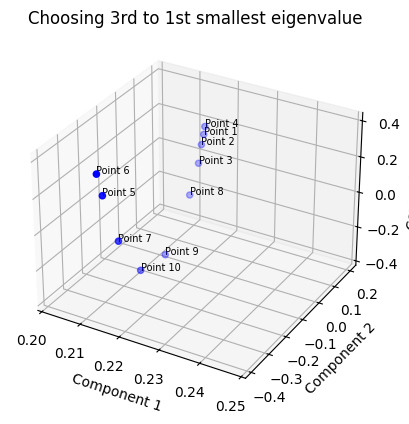

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming `psi` is the 10x3 matrix obtained from the previous code
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the columns of psi for the x, y, and z coordinates
x = psi[:, 0]
y = psi[:, 1]
z = psi[:, 2]

# Plot each row of psi as a point in 3D space
ax.scatter(x, y, z, color='b')

# Optionally, add labels for each point
for i in range(len(x)):
    ax.text(x[i], y[i], z[i], f'Point {i+1}', size=7, zorder=1, color='k')

# Set axis labels
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('Choosing 3rd to 1st smallest eigenvalue')

# Set x-axis range
ax.set_xlim(0.2, 0.25)

plt.show()

(4.)

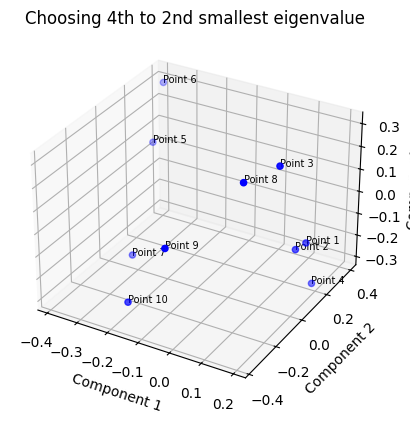

2nd to 4th Smallest Eigenvectors (Psi matirix):
 [[ 0.21320072  0.18831754  0.14189576]
 [ 0.21320072  0.17464619  0.09357859]
 [ 0.21320072  0.15764162 -0.00046639]
 [ 0.21320072  0.19459486  0.18210673]
 [ 0.21320072 -0.3627844   0.25247422]
 [ 0.21320072 -0.38899742  0.39050752]
 [ 0.21320072 -0.28767812 -0.06404401]
 [ 0.21320072  0.10571999 -0.14249883]
 [ 0.21320072 -0.03650001 -0.36950084]
 [ 0.21320072 -0.17380083 -0.33528676]]
The Trace of \Psi^T L \Psi:
 1.0978030751206402
The Product of \Psi^T D \Psi:
 [[1.00000000e+00 4.01623242e-16 1.31050686e-16]
 [4.01623242e-16 1.00000000e+00 1.10723734e-16]
 [1.86561837e-16 1.38479309e-16 1.00000000e+00]]


In [5]:
# Select the eigenvectors corresponding to the 4th smallest to 2nd smalles eigenvalues (smallest)
psi2 = eigenvectors[:, 1:4]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the columns of psi2 for the x, y, and z coordinates
x = psi2[:, 0]
y = psi2[:, 1]
z = psi2[:, 2]

# Plot each row of psi2 as a point in 3D space
ax.scatter(x, y, z, color='b')

# Optionally, add labels for each point
for i in range(len(x)):
    ax.text(x[i], y[i], z[i], f'Point {i+1}', size=7, zorder=1, color='k')

# Set axis labels
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('Choosing 4th to 2nd smallest eigenvalue')

plt.show()
# Display results
print("2nd to 4th Smallest Eigenvectors (Psi matirix):\n", psi)
print(f'The Trace of \Psi^T L \Psi:\n {(psi2.transpose() @ L @ psi2).trace()}')
print(f'The Product of \Psi^T D \Psi:\n {(psi2.transpose() @ D @ psi2)}')